In [70]:
import networkx as nx
#print(nx.__version__)
import csv
import community
import pandas as pd
from itertools import combinations
#create an empty graph
G = nx.Graph()

In [71]:
# Open the CSV file and read the data for languages
with open('dataset/languages.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # Add the language node to graph with green color
        G.add_node(row[0], language=row[1], color='#30FBD0')

In [72]:
#create nodes and edges bewtween repositories and languages
with open('dataset/repos.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of languages into an array of strings
        row[2], row[5], row[6] = tuple(x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace('"', '').split(',') for x in (row[2], row[5], row [6]))
        G.add_node(row[0], name=row[1], topics=row[2], n_star=row[3], n_fork=row[4], languages=row[5], p_lang=row[6], color='#5D7EF5')
        # Add the edges between the repository and the languages
        #for lang in row[5]:
         #   G.add_edge(row[0], lang)

In [73]:
# create nodes and edges between users and repositories
with open('dataset/users.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of repositories into an array of strings
        row[2:4] = [x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace('"', '').split(',') for x in row[2:4]]
        # Add the user node to graph with blue color
        G.add_node(row[0], name=row[1], repos=row[2], commits= row[3], color='#F8A643')
        # Add edges between the user and their repositories
        #for repo in row[2]:
         #   G.add_edge(row[0], repo)

In [74]:
# Add edges between users and repositories based on the users' list of repositories
for node in list(G.nodes):
    # if it's a user node
    if len(node) >= 1:
        if node[0] == "u":
            # for each repository in the user's list of repositories
            for repo in G.nodes[node]['repos']:
                # add an edge between the user and the repository
                G.add_edge(node, repo)
        if node[0] == "r":
            # for each language in the repository's list of languages
            for lang in G.nodes[node]['languages']:
                # add an edge between the repository and the language
                G.add_edge(node, lang)     

nx.info(G)

/var/folders/dn/3rzmgvf53gv2ssvdr1f517gc0000gn/T/ipykernel_8304/418544197.py:16: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 1499 nodes and 2369 edges'

In [6]:
#draw graph with space between nodes
#nx.draw(G, with_labels=False, node_size=1, node_color="#7FB2FD", edge_color="#e795d1", font_size=8, font_color="#000000")
#plt.show()

In [7]:
# Set the layout of the graph
#pos = nx.kamada_kawai_layout(G)

# Draw the nodes and edges of the graph
#nx.draw(G, pos, node_size=200, node_color="#7FB2FD", edge_color="#FF8CCD", with_labels=True, font_size=8)

# Draw the labels of the repositories at an angle to reduce overlap
#repo_labels = nx.get_node_attributes(G, "name")
#repo_pos = {k: (v[0], v[1]-0.1) for k, v in pos.items() if k in repo_labels}
#nx.draw_networkx_labels(G, repo_pos, labels=repo_labels, font_size=8, font_color="k", alpha=1)

# Draw the labels of the users on top of the nodes
#user_labels = nx.get_node_attributes(G, "name")
#nx.draw_networkx_labels(G, pos, labels=user_labels, font_size=8, font_color="k", alpha=1)

# Show the graph
#plt.show()

In [75]:
# Calculate the degree centrality of all nodes
degree_centrality = nx.degree_centrality(G)

# Split the degree centrality for users and repositories
languages_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('l_')}
users_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('u_')}
repos_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('r_')}

# Print the degree centrality of first 10 users in descending order
print("\nDegree centrality of first 5 languages in descending order:")
for node in sorted(languages_degree_centrality, key=languages_degree_centrality.get, reverse=True)[:5]:
    print(node, G.nodes[node]['language'], languages_degree_centrality[node])
    
# Print mean degree centrality for users
print("\nMean degree centrality for languages:", sum(languages_degree_centrality.values())/len(languages_degree_centrality))


Degree centrality of first 5 languages in descending order:
l_0 Ruby 0.48664886515353806
l_1 JavaScript 0.2096128170894526
l_4 Shell 0.0801068090787717
l_8 Python 0.06475300400534045
l_6 C 0.058077436582109475

Mean degree centrality for languages: 0.013930662128258938


{'l_0': Text(-0.1385671550769633, 0.0959029592106065, 'l_0'),
 'l_1': Text(0.03774013728846612, -0.4723830532402187, 'l_1'),
 'l_4': Text(0.5977203312945248, -0.07788400190253797, 'l_4'),
 'l_8': Text(0.5794331841335385, -0.38791029618131956, 'l_8'),
 'l_6': Text(0.629716671031268, 0.17276605488443375, 'l_6')}

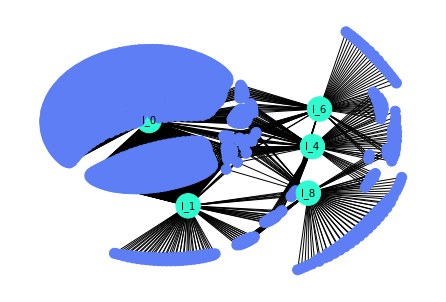

In [76]:
# Draw the graph containing only the top 5 languages with neighbours based on degree centrality
languages_subgraph = nx.Graph()
for node in sorted(languages_degree_centrality, key=languages_degree_centrality.get, reverse=True)[:5]:
    languages_subgraph.add_node(node, color = G.nodes[node]['color'])
    for neighbour in G.neighbors(node):
        if neighbour[0] == "l":
            languages_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        else:
            languages_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        languages_subgraph.add_edge(node, neighbour)

pos = nx.kamada_kawai_layout(languages_subgraph)
node_sizes = [600 if node.startswith('l_') else 100 for node in languages_subgraph.nodes]
nx.draw(languages_subgraph, pos, node_size=node_sizes, node_color=[languages_subgraph.nodes[node]['color'] for node in languages_subgraph.nodes])
labels = {node: node for node in languages_subgraph.nodes if node.startswith('l_')}
nx.draw_networkx_labels(languages_subgraph, pos, labels, font_size=10)

Degree centrality to users 

Calcolato per poi usarlo per disegnare il grafo della modularity per selezionare gli utenti con più repository

In [77]:
print("\nDegree centrality of first 10 users in descending order:")
for node in sorted(users_degree_centrality, key=users_degree_centrality.get, reverse=True)[:10]:
    print(node, users_degree_centrality[node])

# Print mean degree centrality for users
print("\nMean degree centrality for users:", sum(users_degree_centrality.values())/len(users_degree_centrality))


Degree centrality of first 10 users in descending order:
u_64 0.006008010680907877
u_3 0.004005340453938584
u_191 0.004005340453938584
u_70 0.0033377837116154874
u_125 0.0033377837116154874
u_156 0.0033377837116154874
u_238 0.0033377837116154874
u_72 0.0026702269692923898
u_97 0.0026702269692923898
u_99 0.0026702269692923898

Mean degree centrality for users: 0.0009286674976229085


{'u_64': Text(0.4173549983461549, 0.20100011090584688, 'u_64'),
 'u_3': Text(0.12818977160334766, 0.4555563512256938, 'u_3'),
 'u_191': Text(-0.19462711006668806, 0.4313758816589854, 'u_191'),
 'u_70': Text(-0.41790621930205274, 0.22756211791271924, 'u_70'),
 'u_125': Text(-0.4734805934546485, -0.04739418492493523, 'u_125'),
 'u_156': Text(-0.36451071644751754, -0.3058800481957446, 'u_156'),
 'u_238': Text(-0.12886489389197703, -0.4580660116480394, 'u_238'),
 'u_72': Text(0.12951001749051522, -0.46012525063930376, 'u_72'),
 'u_97': Text(0.33379469233703546, -0.3421533192796294, 'u_97'),
 'u_99': Text(0.4567832987002057, -0.14084854968620547, 'u_99')}

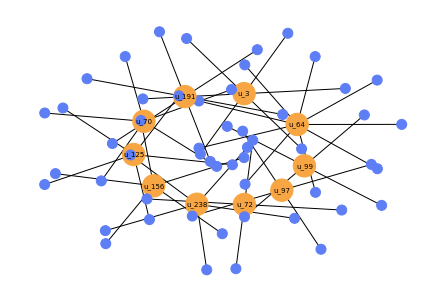

In [78]:
# Draw the graph containing only the top 10 users with neighbours based on degree centrality
users_subgraph = nx.Graph()
for node in sorted(users_degree_centrality, key=users_degree_centrality.get, reverse=True)[:10]:
    users_subgraph.add_node(node, color=G.nodes[node]['color'])
    for neighbour in G.neighbors(node):
        if neighbour[0] == "u":
            users_subgraph.add_node(neighbour, color=G.nodes[neighbour]['color'])
        else:
            users_subgraph.add_node(neighbour, color=G.nodes[neighbour]['color'])
        users_subgraph.add_edge(node, neighbour)

pos = nx.kamada_kawai_layout(users_subgraph)
node_sizes = [500 if node.startswith('u_') else 100 for node in users_subgraph.nodes]
nx.draw(users_subgraph, pos, node_size=node_sizes, node_color=[users_subgraph.nodes[node]['color'] for node in users_subgraph.nodes])
labels = {node: node for node in users_subgraph.nodes if node.startswith('u_')}
nx.draw_networkx_labels(users_subgraph, pos, labels, font_size=7)

Degree centrality to repositories 


In [79]:
print("\nDegree centrality of first 10 users in descending order:")
for node in sorted(repos_degree_centrality, key=repos_degree_centrality.get, reverse=True)[:10]:
    print(node, repos_degree_centrality[node])

# Print mean degree centrality for users
print("\nMean degree centrality for users:", sum(repos_degree_centrality.values())/len(repos_degree_centrality))


Degree centrality of first 10 users in descending order:
r_472 0.017356475300400534
r_677 0.012016021361815754
r_225 0.011348464619492656
r_286 0.010680907877169559
r_744 0.010013351134846462
r_774 0.010013351134846462
r_540 0.008678237650200267
r_37 0.008010680907877168
r_318 0.008010680907877168
r_668 0.008010680907877168

Mean degree centrality for users: 0.0013921143684537244


{'r_472': Text(0.03186341992151627, 0.36007686741346867, 'r_472'),
 'r_677': Text(-0.3471663493028949, 0.1795381957814464, 'r_677'),
 'r_225': Text(-0.25343399276092254, -0.07702491140177987, 'r_225'),
 'r_286': Text(-0.21281981341604084, 0.29889505735772276, 'r_286'),
 'r_744': Text(-0.06053035142332513, -0.20582501700489436, 'r_744'),
 'r_774': Text(0.0350411128831495, 0.2288479568099315, 'r_774'),
 'r_540': Text(0.23497403258862823, -0.11865079426239529, 'r_540'),
 'r_37': Text(0.004270700152380707, 0.3068591095138308, 'r_37'),
 'r_318': Text(0.30269051526382307, -0.7150036524440232, 'r_318'),
 'r_668': Text(0.06751044211814966, -0.012146150252966822, 'r_668')}

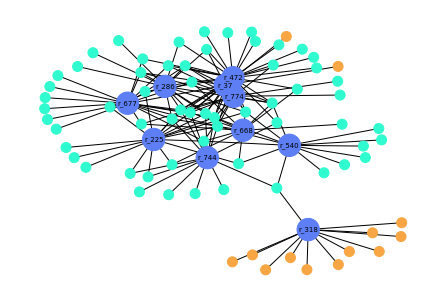

In [80]:
# Draw the graph containing only the top 10 repositories with neighbours based on degree centrality
repos_subgraph = nx.Graph()
for node in sorted(repos_degree_centrality, key=repos_degree_centrality.get, reverse=True)[:10]:
    repos_subgraph.add_node(node, color=G.nodes[node]['color'])
    for neighbour in G.neighbors(node):
        if neighbour[0] == "r":
            repos_subgraph.add_node(neighbour, color=G.nodes[neighbour]['color'])
        else:
            repos_subgraph.add_node(neighbour, color=G.nodes[neighbour]['color'])
        repos_subgraph.add_edge(node, neighbour)

pos = nx.kamada_kawai_layout(repos_subgraph)
node_sizes = [500 if node.startswith('r_') else 100 for node in repos_subgraph.nodes]
nx.draw(repos_subgraph, pos, node_size=node_sizes, node_color=[repos_subgraph.nodes[node]['color'] for node in repos_subgraph.nodes])
labels = {node: node for node in repos_subgraph.nodes if node.startswith('r_')}
nx.draw_networkx_labels(repos_subgraph, pos, labels, font_size=7)



Modularity

calcolata per comprendere se gli utenti di GitHub tendono a specializzarsi in un linguaggio o a variare.
In questo caso abbiamo una modularity pari a 0,55 che indica una forte struttura di comunità nel grafo, che potrebbe essere indicativa di una specializzazione degli utenti in termini di linguaggi di programmazione utilizzati nelle diverse repository.

In particolare, una modularità maggiore di 0,3-0,4 indica una buona struttura di comunità nel grafo, mentre valori maggiori di 0,5 indicano una forte struttura di comunità. Tuttavia, va notato che la modularità da sola potrebbe non essere sufficiente per stabilire se gli utenti tendono a specializzarsi o meno, ma potrebbe essere necessario un'analisi più dettagliata dei dati.

In [81]:
#calculate modularity to find user comunites based on languages used in different repositories
partition = community.best_partition(G)
modularity = community.modularity(partition, G)

# Print the modularity of the graph
print("\nModularity of the graph:", modularity)


Modularity of the graph: 0.5567889089425625


{'u_261': Text(0.5445960762713494, 0.4946889358311007, 'u_261'),
 'u_28': Text(0.6330016707855088, 0.7257395387441623, 'u_28'),
 'u_52': Text(0.4711051060474759, 0.8770535001209989, 'u_52'),
 'u_114': Text(0.28387558404294283, 0.9808548555833049, 'u_114'),
 'u_158': Text(0.07145730818702913, 0.9999999999999999, 'u_158'),
 'u_212': Text(-0.1359959374416367, 0.9648729707095588, 'u_212'),
 'u_231': Text(-0.25991046029926407, 0.8127790573335588, 'u_231'),
 'u_178': Text(-0.772148284573775, 0.6960036587691546, 'u_178'),
 'u_269': Text(-0.9698915337919958, 0.39704248568894085, 'u_269'),
 'u_169': Text(-0.8826092450472336, 0.05090393530011579, 'u_169'),
 'u_208': Text(-0.9367147648497067, -0.3218592712506629, 'u_208'),
 'u_105': Text(-0.8908431259792223, -0.6336313494934319, 'u_105'),
 'u_110': Text(-0.5974140686564821, -0.8999914574482183, 'u_110'),
 'u_41': Text(0.12488929323560405, -0.9181189420811096, 'u_41'),
 'u_70': Text(0.19556288338454425, -0.5991454920774414, 'u_70'),
 'u_63': Text(

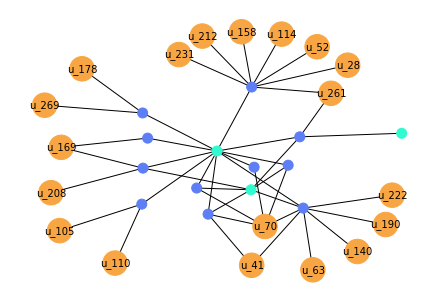

In [82]:
# Draw the graph containing only the top 5 users with neighbours based on modularity and degree centrality of users
users_subgraph = nx.Graph()
for node in sorted(partition, key=partition.get, reverse=True)[:30]:
    users_subgraph.add_node(node, color = G.nodes[node]['color'])
    for neighbour in G.neighbors(node):
        if neighbour[0] == "u":
            users_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        else:
            users_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        users_subgraph.add_edge(node, neighbour)

pos = nx.kamada_kawai_layout(users_subgraph)
node_sizes = [600 if node.startswith('u_') else 100 for node in users_subgraph.nodes]
nx.draw(users_subgraph, pos, node_size=node_sizes, node_color=[users_subgraph.nodes[node]['color'] for node in users_subgraph.nodes])
labels = {node: node for node in users_subgraph.nodes if node.startswith('u_')}
nx.draw_networkx_labels(users_subgraph, pos, labels, font_size=10)


In [ ]:
#print(users_subgraph.nodes.data())

Structural equivalence

Calcola per comprendere quali linguaggi di programmazione vengono spesso utilizzati insieme.

In questo caso siamo andati prima a vedere in ogni repository le combinazioni di linguaggi che vengono utilizzati insieme (prende in cosiderazioni solo liste di lunghezza uguale).
Quindi, se due repository hanno le stesse combinazioni di linguaggio allora sono considerate strutturalmente equivalenti.
Nel grafo sono rappresentati le 5 combinazioni di linguaggi più utilizzati.




Number of structural equivalence classes: {frozenset({'r_1046'}), frozenset({'r_290'}), frozenset({'r_469'}), frozenset({'r_1106', 'r_461', 'r_815', 'r_827', 'r_790', 'r_1086', 'r_1084', 'r_953', 'r_726', 'r_269', 'r_130'}), frozenset({'r_170'}), frozenset({'r_351'}), frozenset({'r_687'}), frozenset({'r_995', 'r_721'}), frozenset({'r_756'}), frozenset({'r_171'}), frozenset({'r_766'}), frozenset({'r_403', 'r_201', 'r_1102', 'r_439'}), frozenset({'r_1049'}), frozenset({'r_112', 'r_879', 'r_997', 'r_202', 'r_114', 'r_767', 'r_1076', 'r_65', 'r_361', 'r_967', 'r_817', 'r_1059', 'r_306'}), frozenset({'r_221', 'r_992'}), frozenset({'r_897', 'r_797'}), frozenset({'r_950'}), frozenset({'r_563'}), frozenset({'r_427'}), frozenset({'r_621', 'r_559', 'r_823'}), frozenset({'r_77'}), frozenset({'r_432'}), frozenset({'r_680'}), frozenset({'r_937'}), frozenset({'r_983'}), frozenset({'r_640'}), frozenset({'r_697', 'r_838'}), frozenset({'r_227'}), frozenset({'r_225'}), frozenset({'r_787'}), frozenset({

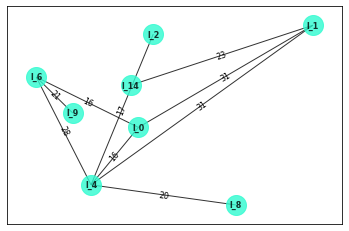

In [83]:
#calculare structural equivalence classes
def same_langs(repo1, repo2):
    langs1 = set(G.nodes[repo1]['languages'])
    langs2 = set(G.nodes[repo2]['languages'])
    return langs1 == langs2

repos = [r for r in G.nodes if r.startswith('r_')]
structural_equivalence = nx.equivalence_classes(repos, same_langs)

# Print the number of structural equivalence classes
print("\nNumber of structural equivalence classes:", structural_equivalence)

#lang_counts = {}
#for equiv_class in structural_equivalence:
 #   lang_set = set()
  #  for repo in equiv_class:
   #     lang_set.update(set(G.nodes[repo]['languages']))
    #for lang in lang_set:
     #   lang_counts[lang] = lang_counts.get(lang, 0) + 1

#top_langs = sorted(lang_counts.items(), key=lambda x: x[1], reverse=True)[:5]
#print(top_langs)

# Print the top 5 languages with the most structural equivalence classes
#print("\nTop 5 languages with the most structural equivalence classes:")
#for lang, count in top_langs:
    #print(lang, count)

# Ottieni le combinazioni di linguaggi utilizzati insieme
lang_combinations = {}
for equiv_class in structural_equivalence:
    lang_set = set()
    for repo in equiv_class:
        lang_set.update(set(G.nodes[repo]['languages']))
    for combo in combinations(lang_set, 2):
        lang_combinations[combo] = lang_combinations.get(combo, 0) + 1

# Stampa le 5 combinazioni di linguaggi più utilizzate
top_combinations = sorted(lang_combinations.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 5 language combinations:")
for combo, count in top_combinations:
    print(combo, count)

#creazione del grafo
G_langs = nx.Graph()
for combo, count in top_combinations:
    lang1, lang2 = combo
    G_langs.add_edge(lang1, lang2, weight=count)

# layout e visualizzazione del grafo
pos = nx.spring_layout(G_langs, k=0.90, iterations=1)

edge_weights = nx.get_edge_attributes(G_langs, 'weight')
nx.draw_networkx_edge_labels(G_langs, pos, edge_labels=edge_weights, font_size=8)
nx.draw_networkx(G_langs, pos, with_labels=True, node_size=400, node_color='#30FBD0', width=1, alpha=0.8, font_size=8, font_color='black', font_weight='bold')

#Cores

##Calcola i progetti più centrali che tendono ad avere un numero maggiore di star e di fork rispetto agli altri

##Grafo composto da nodi che rappresentano solo le repository e che sono collegati tra loro se hanno lo stesso numero di star.

##I cores di un grafo sono un insieme di nodi che sono tutti mutuamente connessi, ovvero ogni nodo all'interno del core è collegato ad ogni altro nodo all'interno del core. Il calcolo dei cores può aiutare a identificare i sottografi densamente connessi all'interno di un grafo. Nel caso specifico del grafo di repository di GitHub, i cores possono aiutare a identificare gruppi di repository che sono molto simili tra loro in termini di popolarità e/o attività.

##Poiché gli archi nel grafo sono solo tra repository con lo stesso numero di stelle, è probabile che si formino dei cluster di repository con lo stesso numero di stelle. Calcolare i cores all'interno di ciascun cluster può aiutare a identificare i gruppi di repository che sono particolarmente attivi e/o popolari all'interno del cluster. Ciò potrebbe essere utile, ad esempio, per identificare i progetti di successo all'interno di un cluster, o per identificare le tendenze di popolarità all'interno del grafo complessivo di repository di GitHub.

##Create graph with users and repositories and calculate centrality based on users.

##Calculate centrality > contributors > centralities to repos

##Creato un sottografo con solo repository collegati da archi se hanno lo stesso numero di star. Su questo sottografo ho calcolato i cores.


In [84]:
# create a subgraph with only 'repository' and 'user' nodes
subgraph_nodes = [n for n in G.nodes if n.startswith(('r', 'u'))]
# create edges between users and repositories
user_repo_edges = [(u, v) for (v, u) in G.edges if u.startswith('u_') and v.startswith('r_')]
subgraph = G.subgraph(subgraph_nodes)

#nx.edges(subgraph)

In [85]:
degree_centrality = nx.degree_centrality(subgraph)
#split degree centrality in repositories 
repos_degree_centrality = {k: v for k, v in degree_centrality.items() if k.startswith('r_')}

print("\nDegree centrality of first 10 users in descending order:")
for node in sorted(repos_degree_centrality, key=repos_degree_centrality.get, reverse=True)[:10]:
    print(node, repos_degree_centrality[node])

# Print mean degree centrality for users
print("\nMean degree centrality:", sum(repos_degree_centrality.values())/len(repos_degree_centrality))



Degree centrality of first 10 users in descending order:
r_318 0.007823613086770981
r_872 0.006401137980085349
r_195 0.005689900426742532
r_785 0.004978662873399715
r_14 0.004267425320056899
r_32 0.004267425320056899
r_201 0.004267425320056899
r_271 0.004267425320056899
r_743 0.0035561877667140826
r_267 0.002844950213371266

Mean degree centrality: 0.0002360357021216921


{'r_318': Text(0.31705105187135174, 0.29612331320646684, 'r_318'),
 'r_872': Text(-0.2836866182566357, 0.3486929021570919, 'r_872'),
 'r_195': Text(-0.41862586981740313, -0.1818342097010074, 'r_195'),
 'r_785': Text(2.991627229812583e-07, -0.46269800793266214, 'r_785'),
 'r_14': Text(0.40003536322324634, -0.2432620582532329, 'r_14')}

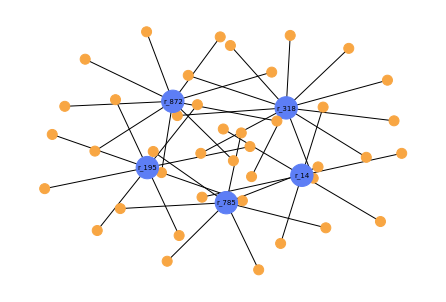

In [86]:
repos_subgraph = nx.Graph()
for node in sorted(repos_degree_centrality, key=repos_degree_centrality.get, reverse=True)[:5]:
    repos_subgraph.add_node(node, color=subgraph.nodes[node]['color'])
    for neighbour in subgraph.neighbors(node):
        if neighbour[0] == "r":
            repos_subgraph.add_node(neighbour, color=subgraph.nodes[neighbour]['color'])
        else:
            repos_subgraph.add_node(neighbour, color=subgraph.nodes[neighbour]['color'])
        repos_subgraph.add_edge(node, neighbour)

pos = nx.kamada_kawai_layout(repos_subgraph)
node_sizes = [500 if node.startswith('r_') else 100 for node in repos_subgraph.nodes]
nx.draw(repos_subgraph, pos, node_size=node_sizes, node_color=[repos_subgraph.nodes[node]['color'] for node in repos_subgraph.nodes])
labels = {node: node for node in repos_subgraph.nodes if node.startswith('r_')}
nx.draw_networkx_labels(repos_subgraph, pos, labels, font_size=7)

In [ ]:
# create a subgraph with only 'repository' and 'user' nodes
#subgraph_nodes = [n for n in G.nodes if n.startswith(('r'))]
# create edges between repositories if have the same number of stars
#user_repo_edges = [(u, v) for (v, u) in G.edges if u.startswith('r_') and v.startswith('r_')]

#subgraph = G.subgraph(subgraph_nodes)

#nx.edges(subgraph)


In [87]:
repo_sub= nx.Graph()
repo_sub = subgraph.subgraph([node for node in subgraph.nodes() if node.startswith('r')])
repo_subgraph_copy = repo_sub.copy()

# Add edges between nodes with the same number of stars
for node1 in repo_subgraph_copy.nodes():
    n_stars1 = int(repo_subgraph_copy.nodes[node1]['n_star'])
    for node2 in repo_subgraph_copy.nodes():
        n_stars2 = int(repo_subgraph_copy.nodes[node2]['n_star'])
        if n_stars1 == n_stars2 and node1 != node2:
            repo_subgraph_copy.add_edge(node1, node2)

nx.info(repo_subgraph_copy)
        
core_number = nx.core_number(repo_subgraph_copy)
print(core_number)
k_core = nx.k_core(repo_subgraph_copy, k=1)
print (k_core)

#sorted k-core nodes by core number and relative core number 
k_core_nodes = sorted(k_core.nodes(), key=lambda x: core_number[x], reverse=True)[:10]
print (k_core_nodes)
#create communities with k-core nodes
#communities_repos = [list(g) for g in nx.connected_components(k_core)]
#print (communities_repos)

/var/folders/dn/3rzmgvf53gv2ssvdr1f517gc0000gn/T/ipykernel_8304/3133984688.py:13: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(repo_subgraph_copy)


{'r_0': 260, 'r_1': 0, 'r_2': 260, 'r_3': 260, 'r_4': 7, 'r_5': 53, 'r_6': 56, 'r_7': 113, 'r_8': 260, 'r_9': 53, 'r_10': 260, 'r_11': 113, 'r_12': 81, 'r_13': 113, 'r_14': 0, 'r_15': 113, 'r_16': 260, 'r_17': 113, 'r_18': 113, 'r_19': 0, 'r_20': 260, 'r_21': 260, 'r_22': 113, 'r_23': 113, 'r_24': 260, 'r_25': 260, 'r_26': 113, 'r_27': 56, 'r_28': 260, 'r_29': 260, 'r_30': 113, 'r_31': 113, 'r_32': 113, 'r_33': 53, 'r_34': 17, 'r_35': 113, 'r_36': 81, 'r_37': 2, 'r_38': 113, 'r_39': 260, 'r_40': 2, 'r_41': 260, 'r_42': 260, 'r_43': 0, 'r_44': 260, 'r_45': 260, 'r_46': 17, 'r_47': 113, 'r_48': 15, 'r_49': 34, 'r_50': 34, 'r_51': 0, 'r_52': 113, 'r_53': 20, 'r_54': 8, 'r_55': 260, 'r_56': 17, 'r_57': 17, 'r_58': 260, 'r_59': 0, 'r_60': 81, 'r_61': 0, 'r_62': 260, 'r_63': 113, 'r_64': 81, 'r_65': 260, 'r_66': 8, 'r_67': 4, 'r_68': 2, 'r_69': 13, 'r_70': 260, 'r_71': 260, 'r_72': 2, 'r_73': 81, 'r_74': 26, 'r_75': 0, 'r_76': 113, 'r_77': 260, 'r_78': 113, 'r_79': 0, 'r_80': 3, 'r_81': 81, 

{'r_0': Text(0.55480463282213, -0.038661327780746366, 'r_0'),
 'r_1': Text(0.7412518675963888, 0.004155296339605558, 'r_1'),
 'r_2': Text(0.6068031419948283, -0.0027053321383855187, 'r_2'),
 'r_3': Text(0.4949662612289773, 0.0008906874564689593, 'r_3'),
 'r_4': Text(0.5828929212760127, 0.23002927142704438, 'r_4'),
 'r_5': Text(0.30989331545115345, 0.022941963839809995, 'r_5'),
 'r_6': Text(0.3431214652370401, 0.15259569587155253, 'r_6'),
 'r_7': Text(0.2819495251801557, -0.14215096354391496, 'r_7'),
 'r_8': Text(0.6090841966127345, 0.03858108556486136, 'r_8'),
 'r_9': Text(0.40140630532785765, 0.1612290678904476, 'r_9'),
 'r_10': Text(0.5592415638457223, 0.022644247632735363, 'r_10'),
 'r_11': Text(0.38123092447091717, 0.025896381974806, 'r_11'),
 'r_12': Text(0.5052976059879112, -0.13550017268897008, 'r_12'),
 'r_13': Text(0.4697301511033801, -0.05795886223913902, 'r_13'),
 'r_14': Text(0.7390368562273191, 0.057386001776358796, 'r_14'),
 'r_15': Text(0.25936711444710037, -0.0063546947

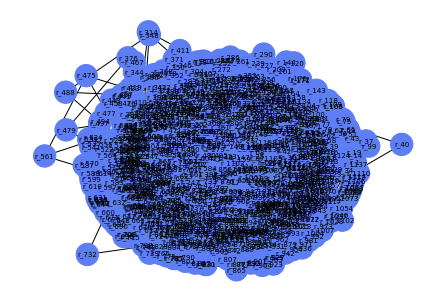

In [88]:
#draw the graph with k-core for the first 10 repositories with highest degree centrality
#repo_subgraph_copy = nx.Graph()
for node in sorted(repos_degree_centrality, key=repos_degree_centrality.get, reverse=True)[:1]:
    repo_subgraph_copy.add_node(node, color=repo_subgraph_copy.nodes[node]['color'])
    for neighbour in repo_subgraph_copy.neighbors(node):
        if neighbour[0] == "r":
            repo_subgraph_copy.add_node(neighbour, color=repo_subgraph_copy.nodes[neighbour]['color'])
            #if repository is not in repo_subgraph_copy jump to the next neighbour
            if neighbour not in repo_subgraph_copy.nodes():
                #print the repository that is not in repo_subgraph_copy
                print (neighbour)
                continue
        else:
            repo_subgraph_copy.add_node(neighbour, color=repo_subgraph_copy.nodes[neighbour]['color'])
        repo_subgraph_copy.add_edge(node, neighbour)

pos = nx.kamada_kawai_layout(repo_subgraph_copy)
node_sizes = [500 if node.startswith('r_') else 100 for node in repo_subgraph_copy.nodes]
nx.draw(repo_subgraph_copy, pos, node_size=node_sizes, node_color=[repo_subgraph_copy.nodes[node]['color'] for node in repo_subgraph_copy.nodes])
labels = {node: node for node in repo_subgraph_copy.nodes if node.startswith('r_')}
nx.draw_networkx_labels(repo_subgraph_copy, pos, labels, font_size=7)

In [ ]:
#pos = nx.kamada_kawai_layout(repo_subgraph_copy)
#node_sizes = [500 if node.startswith('r_') else 100 for node in repo_subgraph_copy.nodes]
#nx.draw(repo_subgraph_copy, pos, node_size=node_sizes, node_color=[repo_subgraph_copy.nodes[node]['color'] for node in repo_subgraph_copy.nodes])
#labels = {node: node for node in repo_subgraph_copy.nodes if node.startswith('r_')}
#nx.draw_networkx_labels(repo_subgraph_copy, pos, labels, font_size=7)

#Homophily

##capire se gli utenti che frequentano la piattaforma tendono a collaborare con altri utenti che sviluppano dei progetti simili tra loro, per esempio utilizzano lo stesso linguaggio di programmazione ed inoltre cercare di capire se utenti connessi tra di loro utilizzano dei topics nelle repository.

In [ ]:
#nx.nodes(G)
#nx.get_node_attributes(G, 'languages')
#nx.info(G)

In [97]:
# create a subgraph with only 'repository' and 'user' nodes
subgraph_nodes = [n for n in G.nodes if n.startswith(('u', 'r'))]
# create edges between users and repositories
user_repo_edges = [(u, v) for (v, u) in G.edges if u.startswith('u_') and v.startswith('r_')]
subgraph_ru = G.subgraph(subgraph_nodes)

In [112]:
# crea un sottografo con i nodi utente
user_nodes = [n for n in G.nodes if n.startswith("u")]
subgraph = G.subgraph(user_nodes).copy()

# aggiungi gli archi tra utenti che hanno contribuito alla stessa repository
for repo_node in subgraph_ru.nodes:
    # se il nodo corrente è una repository
    if repo_node.startswith("r"):
        # crea un insieme di utenti che hanno contribuito alla repository corrente
        repo_users = set(subgraph_ru.neighbors(repo_node)).intersection(user_nodes)
        # crea gli archi tra le coppie di utenti che hanno contribuito alla stessa repository
        subgraph.add_edges_from(combinations(repo_users,2))


In [118]:
# crea un dizionario vuoto per gli attributi dei nodi degli utenti nel sottografo
user_attrs = {}

for user_node in subgraph.nodes():
    #create a set of repositories that the user has contributed 
    user_repos = set(n for n in subgraph_ru.neighbors(user_node) if n.startswith("r"))
    languages = set()
    topics = set()
    for repo_node in user_repos:
        languages |= set(subgraph_ru.nodes[repo_node]['languages'])
        topics |= set(subgraph_ru.nodes[repo_node]['topics'])
    #add languages and topics to users attributes
    user_attrs[user_node] = {'languages': list(languages), 'topics': list(topics)}

# add attributes to nodes
nx.set_node_attributes(subgraph, user_attrs)
#nx.get_node_attributes(subgraph, 'languages')


In [119]:
# take only the lanuages most used 
for node in subgraph.nodes:
    if node.startswith('u_') and subgraph.nodes[node]['languages'] != []:
        max_lang = subgraph.nodes[node]['languages'][0]
        subgraph.nodes[node]['languages'] = ' '.join(subgraph.nodes[node]['languages'])

lan_hom = nx.attribute_assortativity_coefficient(subgraph, 'languages')
print ("Languages homophily:", lan_hom)

Languages homophily: 0.558336273246312


In [120]:
for node in subgraph.nodes:
    if node.startswith('u_') and subgraph.nodes[node]['topics'] != []:
        max_lang = subgraph.nodes[node]['topics'][0]
        subgraph.nodes[node]['topics'] = ' '.join(subgraph.nodes[node]['topics'])

top_hom = nx.attribute_assortativity_coefficient(subgraph, 'topics')
print ("Topics homophily:", top_hom)

Topics homophily: 0.7175534559920437
